In [1]:
import scanpy as sc
from anndata import AnnData
import pandas as pd
from scvi.model.utils import mde

/archive/hackathon/Komen_Mar_2023/hackers06/hack033/miniconda3/envs/pinkPanther/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/archive/hackathon/Komen_Mar_2023/hackers06/hack033/miniconda3/envs/pinkPanther/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libjpeg.so.8: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
Global seed set to 0


## load the prediction data

In [16]:
pred = pd.read_csv('../code/ML_prediction/predicted_best_drug_regime_for_patient_cells.csv')
label = pd.read_csv('../code/ML_prediction/drug_regime_id_mappings.csv')
label.rename(columns={'Unnamed: 0':'predicted_best_drug_regime'},inplace=True)
pred = pred.merge(label,on='predicted_best_drug_regime')
# get the annData
adata = AnnData(obs=pred)
adata.obs['Patient'] = adata.obs['Barcodes'].map(lambda x: '_'.join(x.split('_')[-2:]))
adata.obs['combination'] = adata.obs['ANCHOR_NAME'].astype(str) +'+' + adata.obs['LIBRARY_NAME'].astype(str)

/archive/hackathon/Komen_Mar_2023/hackers06/hack033/miniconda3/envs/pinkPanther/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


## UMAP for visualiation

In [18]:
adata.obsm['latent'] = pred.loc[:,pred.columns.str.contains('Latent')].values
adata.obsm["X_mde"] = mde(adata.obsm["latent"])

/archive/hackathon/Komen_Mar_2023/hackers06/hack033/miniconda3/envs/pinkPanther/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/archive/hackathon/Komen_Mar_2023/hackers06/hack033/miniconda3/envs/pinkPanther/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


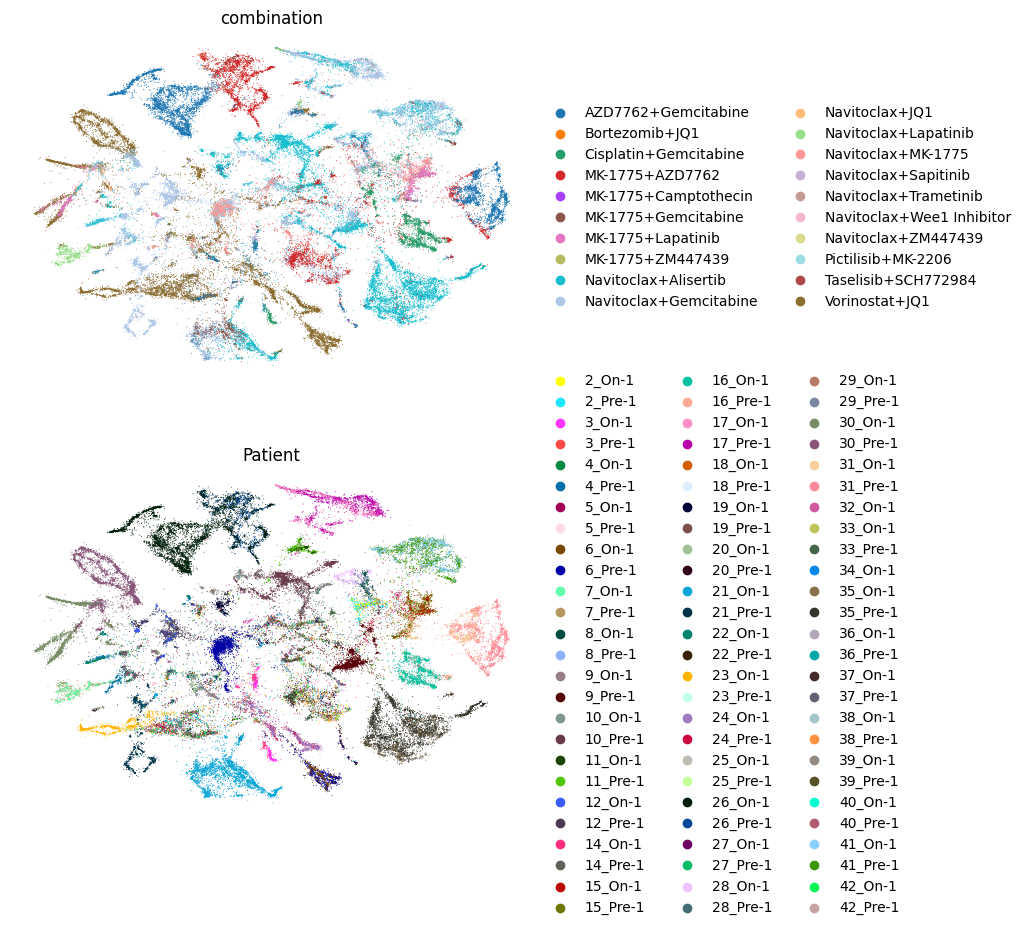

In [26]:
fig = sc.pl.embedding(
    adata,
    basis="X_mde",
    color=["combination","Patient"],
    frameon=False,
    ncols=1,
    return_fig=True
)
fig.savefig('../figures/patient_prediction_umap.svg',bbox_inches='tight')

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_47568/2677217589.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['percent'] = subset['N'] / subset['N'].sum()


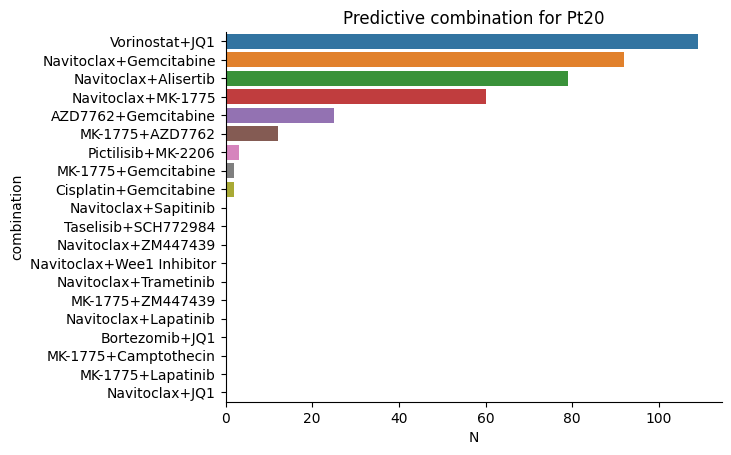

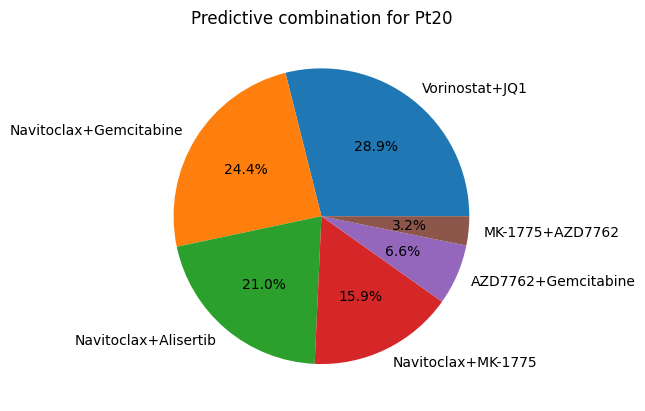

In [97]:
patient = '20_On-1'
name = patient.split('_')[0]
dt = adata.obs.groupby(['Patient'])['combination'].value_counts().rename('N').reset_index()
subset = dt.loc[dt.Patient.isin([patient]),:]
ax = sns.barplot(data=subset,y='combination',x='N',order=subset.sort_values('N',ascending=False)['combination'],
                palette='tab10')
ax.spines[['right', 'top']].set_visible(False)
ax.set_title(f"Predictive combination for Pt{name}")
plt.savefig(f'../figures/patient_{name}_prediction.svg',bbox_inches='tight')

subset['percent'] = subset['N'] / subset['N'].sum()
subset = subset.loc[subset['percent'] > .01,:]

fig, ax = plt.subplots()
sizes = subset['N']
labels = subset['combination']
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title(f'Predictive combination for Pt{name}')
plt.savefig(f'../figures/patient_{name}_prediction_pie.svg',bbox_inches='tight')

/tmp/ipykernel_47568/1520797063.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['percent'] = subset['N'] / subset['N'].sum()


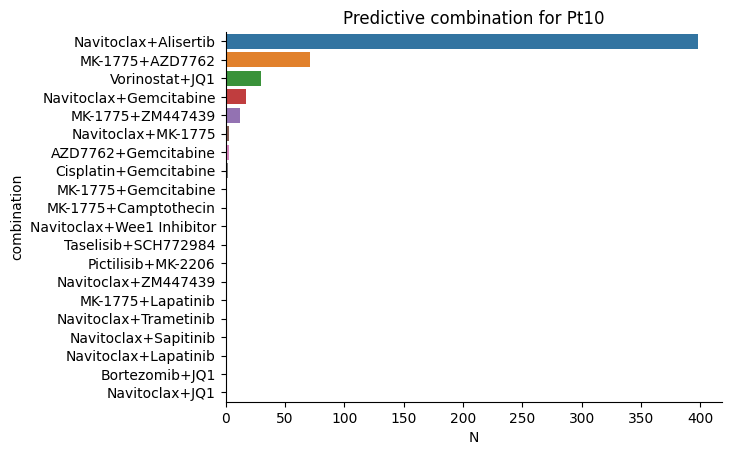

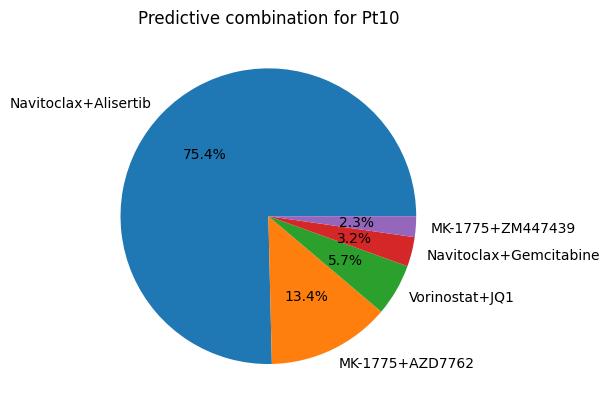

In [98]:
patient = '10_On-1'
name = patient.split('_')[0]
dt = adata.obs.groupby(['Patient'])['combination'].value_counts().rename('N').reset_index()
subset = dt.loc[dt.Patient.isin([patient]),:]
ax = sns.barplot(data=subset,y='combination',x='N',order=subset.sort_values('N',ascending=False)['combination'],
                palette='tab10')
ax.spines[['right', 'top']].set_visible(False)
ax.set_title(f"Predictive combination for Pt{name}")
plt.savefig(f'../figures/patient_{name}_prediction.svg',bbox_inches='tight')

subset['percent'] = subset['N'] / subset['N'].sum()
subset = subset.loc[subset['percent'] > .01,:]

fig, ax = plt.subplots()
sizes = subset['N']
labels = subset['combination']
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title(f'Predictive combination for Pt{name}')
plt.savefig(f'../figures/patient_{name}_prediction_pie.svg',bbox_inches='tight')